Importation Des Bibliothèques

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Charger Le dataset

In [50]:
file_path='ai4i2020.csv'
df = pd.read_csv(file_path)




Exploration Des Données


In [51]:
print(df.shape)

(10000, 14)


Affichage des 5 premières lignes du dataframe

In [52]:
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

Statistiques descriptives

In [53]:
print(df.describe())


               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

Information sur les types de données et les valeurs manquantes

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

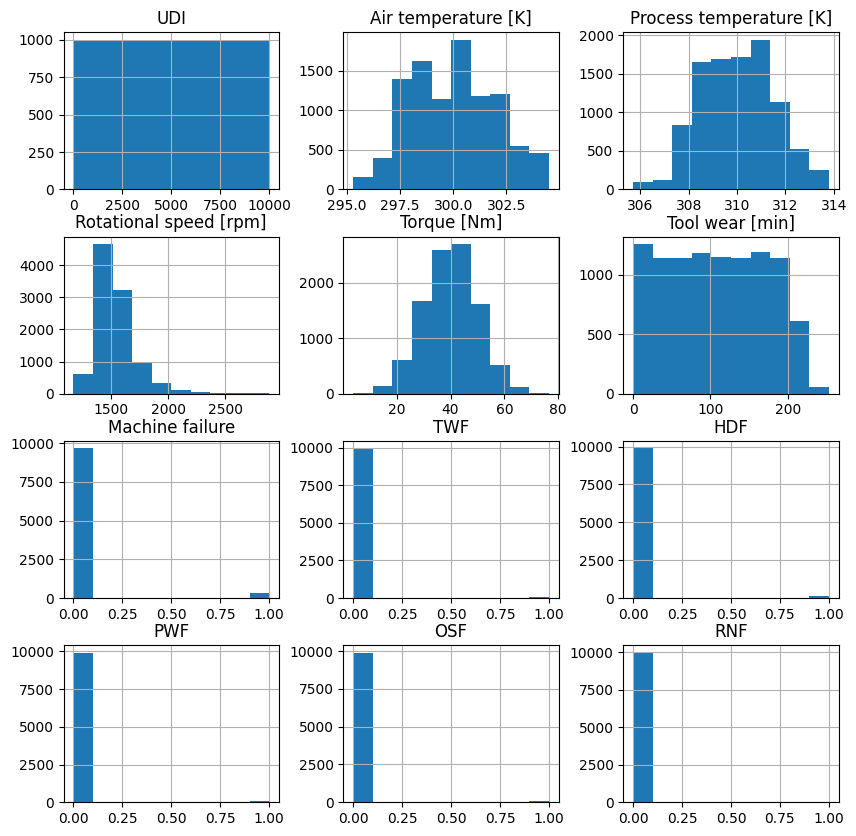

In [55]:
#plotting the data
df.hist(figsize=(10, 10))
plt.show()

Nettoyage & Prétraitement des Données

In [56]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les valeurs manquantes s'il y en a
df = df.dropna()
print(df.shape)


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
(10000, 14)


In [57]:
# supprimmer les dupliqués
df.drop_duplicates(inplace=True)
print(df.shape)

(10000, 14)


Normalisation Des Données

In [8]:
from sklearn.preprocessing import StandardScaler

# Normaliser les colonnes pertinentes
scaler = StandardScaler()
columns_to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


Sélectionner les Caractéristiques et la Cible


In [22]:
#pour s'assurer des noms des colomnnes exploitées 
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [58]:
# Définir les caractéristiques et la cible
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['Machine failure']


 Diviser les Données en Ensembles d'Entraînement et de Test


In [59]:
from sklearn.model_selection import train_test_split

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entraîner le Modèle

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Évaluer le Modèle

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

[[1931    8]
 [  25   36]]


Matrice De Confusion

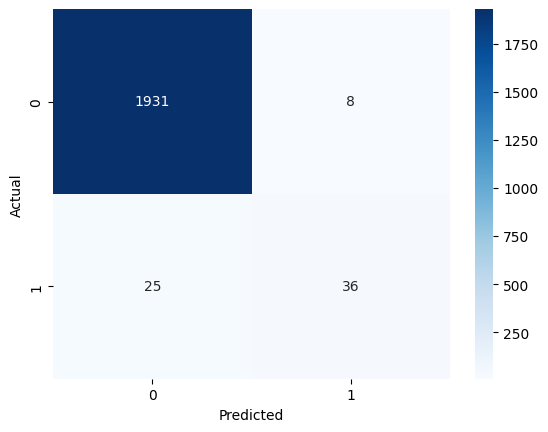

In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Calcul des Métriques de Performance

In [41]:
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

Afficher les résultats


In [42]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1_score:.4f}')

Accuracy: 0.9835
Precision: 0.8182
Recall: 0.5902
F1-Score: 0.6857


# Interprétation


Accuracy : Le modèle est globalement très précis avec une précision de 98.35%. Cela signifie qu'une grande majorité des prédictions sont correctes.


Precision : Une précision de 81.82% indique que lorsque le modèle prédit une panne, il a raison environ 82% du temps.


Recall : Un rappel de 59.02% montre que le modèle n'identifie que 59% des vraies pannes. Cela signifie qu'il manque environ 41% des pannes (faux négatifs).


F1-Score : Un F1-Score de 68.57% indique un équilibre entre la précision et le rappel, mais il y a encore une marge d'amélioration.